In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import datasets

In [2]:
data=pd.read_csv('Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


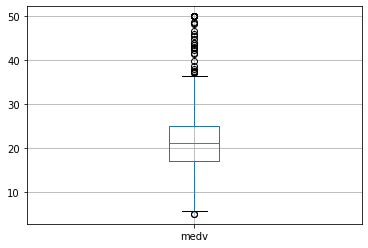

In [14]:
#as you can see in the boxplot the range of the data is from 0 to 50. 
#we will use this range in binning the data 
boxplot = data.boxplot(column=['medv'])

In [25]:
#since we are using decision tree classifier, we need to have categorical data.
# converting our target column, ie medv into categorical data 
bins=[0,15,30,45,60]
labels=['cheapest','low','medium','high']

In [26]:

data['HousingCostBin'] = pd.cut(data['medv'], bins,labels=labels)


In [27]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,HousingCostBin
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,low
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,low
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,medium
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,medium
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,medium


In [28]:
pd.value_counts(data['HousingCostBin'])

low         325
cheapest     97
medium       62
high         22
Name: HousingCostBin, dtype: int64

In [29]:
#dropping medv column since it returns sa,e value as housingcostBin 
data.drop(columns=['medv'])

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,HousingCostBin
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,low
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,low
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,medium
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,medium
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,low
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,low
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,low
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,low


In [35]:
#getting target and data values 
#predictor variable
x=np.array(data[['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]) 

y=np.array(data['HousingCostBin']) #response variable

In [36]:
#splitting the data into training data ad test data 
x_train,x_test , y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [38]:
x.shape

(506, 13)

In [39]:
y.shape

(506,)

In [40]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.8503937007874016

In [42]:
#Maximum Depth of a Tree- This parameter determines the maximum depth of the tree. 
#A higher value of this variable causes overfitting and a lower value causes underfitting.
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=7, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, random_state=100)

In [43]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=7, min_samples_leaf=5)
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       random_state=100)

In [59]:
y_pred = clf_gini.predict(x_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)
DTFacc=accuracy_score(y_test,y_pred)*100

Accuracy is : 84.25196850393701


In [45]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[16  0  6  0]
 [ 1  2  1  2]
 [ 5  0 81  3]
 [ 0  0  2  8]]


In [46]:
y_pred = clf_entropy.predict(x_test)
print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

Accuracy is : 82.67716535433071


In [47]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[13  0  9  0]
 [ 0  2  2  2]
 [ 3  0 82  4]
 [ 0  1  1  8]]


In [48]:
features=clf_entropy.feature_importances_
imp_features=features.argsort()[::-1][:5]
print(imp_features)
#a=X_train2.columns[imp_features]
#b=list(a)

[12  5  0 10  4]


[Text(386.30769230769226, 509.625, 'X[12] <= 15.135\nentropy = 1.474\nsamples = 379\nvalue = [75, 16, 236, 52]'),
 Text(187.78846153846152, 441.675, 'X[5] <= 6.728\nentropy = 1.123\nsamples = 259\nvalue = [3, 16, 188, 52]'),
 Text(42.92307692307692, 373.725, 'X[12] <= 4.46\nentropy = 0.329\nsamples = 180\nvalue = [2, 2, 172, 4]'),
 Text(21.46153846153846, 305.775, 'entropy = 1.522\nsamples = 5\nvalue = [0, 2, 2, 1]'),
 Text(64.38461538461539, 305.775, 'X[9] <= 207.5\nentropy = 0.215\nsamples = 175\nvalue = [2, 0, 170, 3]'),
 Text(42.92307692307692, 237.825, 'entropy = 0.863\nsamples = 7\nvalue = [0, 0, 5, 2]'),
 Text(85.84615384615384, 237.825, 'X[0] <= 0.568\nentropy = 0.146\nsamples = 168\nvalue = [2, 0, 165, 1]'),
 Text(64.38461538461539, 169.875, 'entropy = 0.0\nsamples = 120\nvalue = [0, 0, 120, 0]'),
 Text(107.30769230769229, 169.875, 'X[0] <= 0.744\nentropy = 0.395\nsamples = 48\nvalue = [2, 0, 45, 1]'),
 Text(85.84615384615384, 101.92500000000001, 'entropy = 0.722\nsamples = 5\

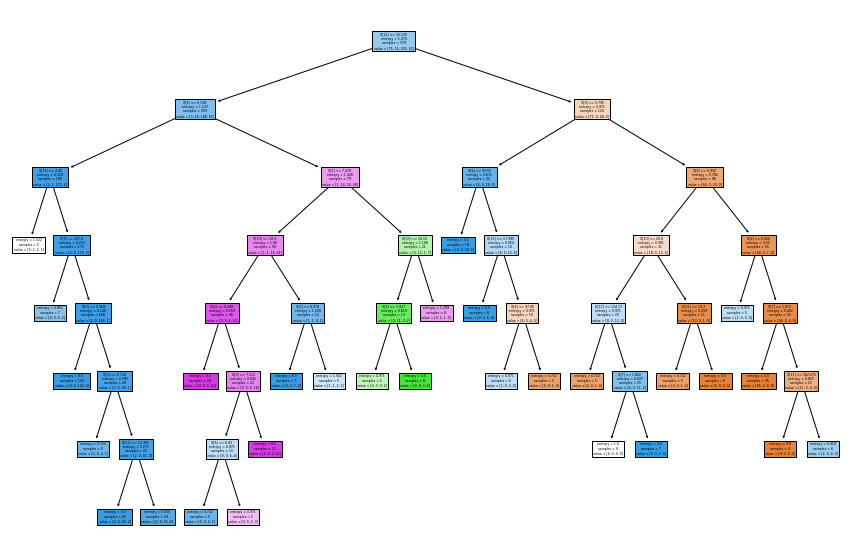

In [49]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_entropy,filled=True)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8661417322834646

In [61]:
y_pred = rf.predict(x_test)
print ("Accuracy of RandomForest is :", accuracy_score(y_test,y_pred)*100)
RFacc=accuracy_score(y_test,y_pred)*100
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy of RandomForest is : 86.61417322834646
[[18  0  4  0]
 [ 0  1  2  3]
 [ 4  0 83  2]
 [ 0  0  2  8]]


In [55]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.6692913385826772

In [60]:
y_pred=model.predict(x_test)
print ("Accuracy of ADAboost is :", accuracy_score(y_test,y_pred)*100)
ADAacc=accuracy_score(y_test,y_pred)*100

Accuracy of ADAboost is : 66.92913385826772


In [62]:
print(ADAacc)
print(RFacc)
print(DTFacc)

66.92913385826772
86.61417322834646
84.25196850393701


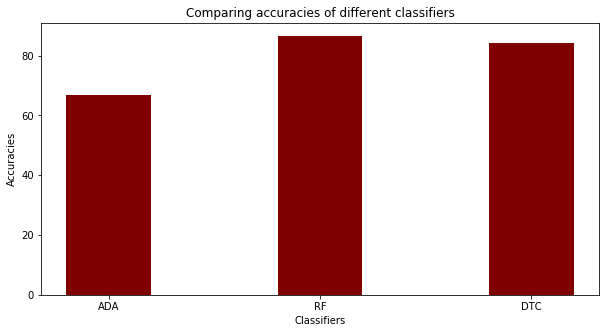

In [66]:
# creating the dataset
dataAcc = {'ADA':ADAacc, 'RF':RFacc, 'DTC':DTFacc}
classifiers = list(dataAcc.keys())
values = list(dataAcc.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(classifiers, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Classifiers")
plt.ylabel("Accuracies")
plt.title("Comparing accuracies of different classifiers")
plt.show()